<a href="https://colab.research.google.com/github/micah-shull/LLMs/blob/main/LLM_016_text_classification_LogReg_TfidfVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here’s a tutorial itinerary designed to build and strengthen your understanding of text classification fundamentals, specifically using **Logistic Regression** and **TfidfVectorizer**. We’ll start with easier datasets like spam detection and gradually move toward more nuanced text classification tasks.

---

### Notebook Tutorial Itinerary: Text Classification with Logistic Regression and TfidfVectorizer

#### **1. Notebook Introduction**
   - **Objective**: Outline the goal of the notebook, which is to develop a strong understanding of text classification by working with Logistic Regression and TfidfVectorizer.
   - **Tools**: Provide a brief description of Logistic Regression and TfidfVectorizer and why they’re commonly used together for text classification.

---

#### **2. Data Loading and Preprocessing**
   - **Step-by-Step Data Preparation**: Create a reusable function to load and preprocess text data (e.g., removing numbers, stop words, punctuation).
   - **Datasets to Practice**:
     - **SMS Spam Collection** (Ham/Spam): A straightforward binary classification dataset that’s ideal for building foundational skills.
     - **IMDb Reviews** (Positive/Negative): Useful for learning to handle sentiment data.
     - **Amazon Product Reviews** (Positive/Negative/Neutral): Adds complexity by introducing three classes and a mix of topics.

---

#### **3. Exploratory Data Analysis (EDA)**
   - **Text Data Exploration**: Basic word counts, average document length, and visualizing the most common words in each class.
   - **EDA Goals**: Understanding key data patterns will help you decide which preprocessing and feature engineering steps are relevant.

---

#### **4. Text Vectorization with TfidfVectorizer**
   - **TfidfVectorizer Basics**:
     - Introduction to `max_features`, `ngram_range`, and `stop_words` parameters.
     - Compare Tfidf with and without these parameters to see how feature selection impacts performance.
   - **Experiments**:
     - Try unigrams only (single words) vs. bigrams or trigrams to observe differences in model performance.
     - Experiment with `max_features` to understand its effect on the dimensionality and accuracy of your model.

---

#### **5. Model Training with Logistic Regression**
   - **Logistic Regression Setup**:
     - Introduce the key parameters (`C` for regularization, `class_weight`, etc.).
     - Explain how class weights can improve model performance in imbalanced datasets.
   - **Training on Different Datasets**:
     - Train separate models on each dataset (spam, sentiment) to understand how model performance varies across tasks.
   - **Experimenting with Regularization**: Vary the `C` parameter to see its effect on model performance and potential overfitting.

---

#### **6. Model Evaluation and Interpretation**
   - **Performance Metrics**: Use classification report, confusion matrix, and accuracy to evaluate each model.
   - **Understanding Misclassifications**:
     - Examine a few misclassified examples to understand where the model struggles.
     - Discuss ways to improve, such as tuning vectorizer parameters, adding bigrams, or using a larger `max_features` value.

---

#### **7. Model Tuning and Optimization**
   - **Grid Search for Hyperparameter Tuning**:
     - Implement GridSearchCV to optimize `C` in Logistic Regression and `max_features` in TfidfVectorizer.
   - **Cross-Validation**:
     - Apply cross-validation to assess the robustness of each model across different dataset splits.

---

#### **8. Final Model Comparison and Insights**
   - **Dataset Performance Summary**: Summarize the results for each dataset, highlighting differences in performance and key takeaways.
   - **Tips for Real-World Applications**: Discuss the applications of text classification in real-world scenarios, such as customer support, sentiment analysis, and spam detection.
   - **Reflection on Key Learnings**: Summarize the most important aspects of using Logistic Regression and TfidfVectorizer for text classification.

---

### Additional Suggestions for the Tutorial
1. **Compare Models**: Optionally, compare Logistic Regression with a simple Naive Bayes model to see differences in classification performance.
2. **Document Everything**: Write detailed comments and explanations for each step. Creating a well-documented notebook is invaluable for reinforcing your learning.
3. **Gradual Complexity**: Start with binary classifications (like spam detection) and gradually introduce more complex, multi-class datasets to deepen your understanding.

This itinerary provides a structured path for mastering text classification with Logistic Regression and TfidfVectorizer, enabling you to understand fundamental techniques while gaining practical, hands-on experience. Let me know if you’d like further customization or additional dataset recommendations!

## Notebook Setup and Data Loading

In [5]:
# !pip install transformers datasets
# !pip install python-dotenv

In [14]:
from datasets import load_dataset

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from datasets import load_dataset

# Function to load SMS Spam dataset from Hugging Face
# def load_sms_spam_data():
#     dataset = load_dataset("sms_spam")
#     documents = dataset["train"]["sms"]
#     labels = ["ham" if label == "ham" else "spam" for label in dataset["train"]["label"]]
#     return documents, labels

def load_sms_spam_data():
    dataset = load_dataset("sms_spam")
    documents = dataset["train"]["sms"]
    labels = list(dataset["train"]["label"])  # Directly convert the labels to a list
    return documents, labels

# Function to load IMDb dataset from Hugging Face
def load_imdb_data():
    dataset = load_dataset("imdb")
    documents = dataset["train"]["text"]
    labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]
    return documents, labels

# Load SMS Spam dataset
sms_documents, sms_labels = load_sms_spam_data()

# Load IMDb dataset
imdb_documents, imdb_labels = load_imdb_data()


### Check for Class Imbalance

Absolutely, here’s a summary of why checking for class imbalance is crucial in classification tasks, especially when working with spam detection:

### Importance of Checking for Class Imbalance
Class imbalance occurs when one class has significantly more samples than the other(s), as seen in the SMS Spam dataset where `"ham"` messages greatly outnumber `"spam"`. This imbalance affects model performance and can lead to biased predictions. In an imbalanced dataset, a model may appear accurate by simply predicting the majority class most of the time, even if it completely misses the minority class.

#### Effects on Model Performance
- **Accuracy Paradox**: With imbalanced data, a model could achieve high accuracy by predominantly predicting the majority class. For instance, predicting all messages as `"ham"` would yield high accuracy here, but it would miss almost all `"spam"` cases.
- **Bias Toward the Majority Class**: Many algorithms tend to favor the majority class unless explicitly adjusted. This leads to poor recall for the minority class, meaning `"spam"` messages could frequently go undetected.

### Prioritizing Recall for Class 1 (Spam)
In spam detection, **recall for the `"spam"` class (class 1)** is especially critical because:
- **Impact of False Negatives**: Missing a spam message (false negative) means letting unwanted or potentially harmful content through, which could affect user experience or even lead to security issues.
- **Focus on Catching Spam**: By prioritizing recall for `"spam"`, we aim to catch as many spam messages as possible, even if it sometimes means incorrectly flagging a few `"ham"` messages as `"spam"` (higher false positives).

### Why High Recall for Spam is More Challenging Than High Average Accuracy
- **Recall vs. Accuracy**: Achieving high recall for `"spam"` involves the model being very sensitive to spam indicators. This sensitivity makes it harder to balance precision (avoiding false positives), as it may mistakenly classify some `"ham"` messages as `"spam"`.
- **Trade-off with Precision**: Improving recall for `"spam"` can often lead to lower precision, meaning more `"ham"` messages are incorrectly flagged. However, in spam detection, recall for spam often takes priority since missing spam has a higher cost.

### How We’ll Address Imbalance
1. **Class Weight Adjustment**: In Logistic Regression, setting `class_weight='balanced'` helps the model give more weight to the minority class, improving recall for spam.
2. **Metric Prioritization**: Instead of focusing solely on accuracy, we’ll track recall and precision for spam to ensure the model effectively identifies spam while managing false positives.

By focusing on these strategies, our model can better identify spam messages even in an imbalanced dataset, ensuring it performs well for the actual goal of the task rather than just maximizing overall accuracy.

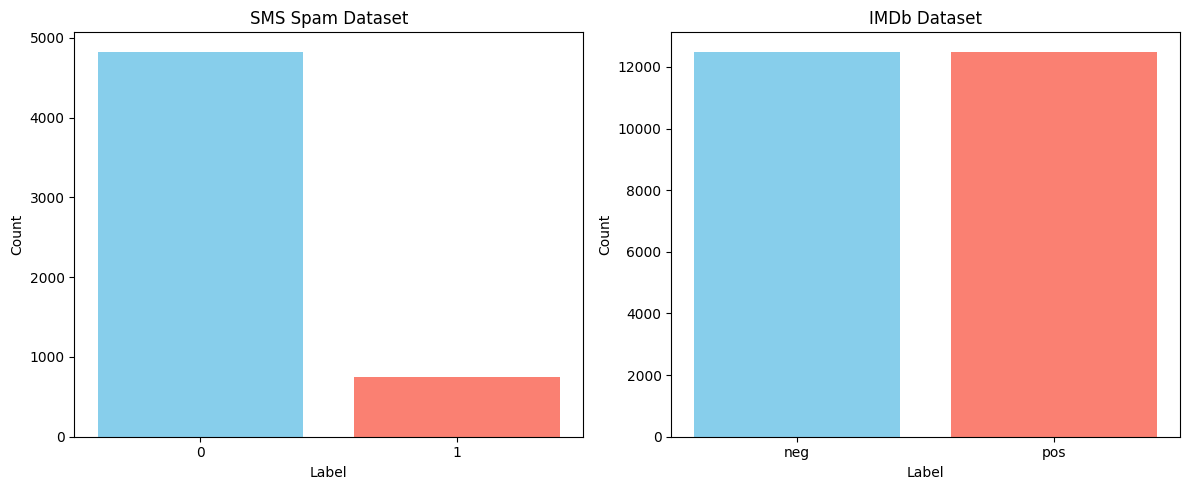

In [18]:
import matplotlib.pyplot as plt

# Plot distributions in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SMS Spam Distribution
axes[0].bar(sms_value_counts.index, sms_value_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title("SMS Spam Dataset")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(sms_value_counts.index)))
axes[0].set_xticklabels(sms_value_counts.index)

# IMDb Dataset Distribution
axes[1].bar(imdb_value_counts.index, imdb_value_counts.values, color=['skyblue', 'salmon'])
axes[1].set_title("IMDb Dataset")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(imdb_value_counts.index)))
axes[1].set_xticklabels(imdb_value_counts.index)

# Display the plots
plt.tight_layout()
plt.show()


In [17]:
# Calculate and print value counts
sms_value_counts = pd.Series(sms_labels).value_counts()
imdb_value_counts = pd.Series(imdb_labels).value_counts()

print("SMS Spam Dataset Value Counts:")
print(sms_value_counts)
print("\nIMDb Dataset Value Counts:")
print(imdb_value_counts)


SMS Spam Dataset Value Counts:
0    4827
1     747
Name: count, dtype: int64

IMDb Dataset Value Counts:
neg    12500
pos    12500
Name: count, dtype: int64


### Preview Text Data

In [16]:
# Preview function to display sample data
def preview_data(documents, labels, num_samples=3):
    for i in range(num_samples):
        print(f"Sample {i + 1}:")
        print("Text:", documents[i])
        print("Label:", labels[i])
        print("-" * 50)

# Preview SMS Spam data
print("SMS Spam Dataset Samples:")
preview_data(sms_documents, sms_labels)

# Preview IMDb data
print("\nIMDb Dataset Samples:")
preview_data(imdb_documents, imdb_labels)


SMS Spam Dataset Samples:
Sample 1:
Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Label: 0
--------------------------------------------------
Sample 2:
Text: Ok lar... Joking wif u oni...

Label: 0
--------------------------------------------------
Sample 3:
Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Label: 1
--------------------------------------------------

IMDb Dataset Samples:
Sample 1:
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena

### Data Splitting and Preprocessing
In `train_test_split`, there’s no direct `imbalanced` argument, but there is an option to ensure that the class distribution remains the same in both the training and test sets. This is called **stratified sampling**, and it can be achieved by setting the `stratify` parameter.

### Explanation of `stratify=sms_labels`
- **Stratified Sampling**: Setting `stratify=sms_labels` ensures that the proportion of each class (ham and spam) is preserved in both the training and test sets. So if spam constitutes 15% of the data, this ratio will be approximately maintained in each split.
- **Why It’s Important**: In imbalanced datasets, stratified sampling prevents the test set from being overly biased toward the majority class, which could lead to misleading evaluation results.

This simple addition helps maintain class balance across splits and ensures a more reliable performance assessment.

In [20]:
# Split SMS Spam dataset
sms_train_texts, sms_test_texts, sms_train_labels, sms_test_labels = train_test_split(
    sms_documents, sms_labels, test_size=0.2, random_state=42, stratify=sms_labels
)

# Split IMDb dataset
imdb_train_texts, imdb_test_texts, imdb_train_labels, imdb_test_labels = train_test_split(
    imdb_documents, imdb_labels, test_size=0.2, random_state=42
)


### Initialize TfidfVectorizer and transform text data.

In [21]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Fit-transform on the training data and transform the test data
sms_train_vectors = vectorizer.fit_transform(sms_train_texts)
sms_test_vectors = vectorizer.transform(sms_test_texts)

imdb_train_vectors = vectorizer.fit_transform(imdb_train_texts)
imdb_test_vectors = vectorizer.transform(imdb_test_texts)

### Model Training and Evaluation

### Ham | Spam Class Imbalance

#### Explanation of `class_weight='balanced'`
- **Balanced Weights**: Setting `class_weight='balanced'` automatically adjusts the weights inversely proportional to class frequencies, giving more weight to the minority class (spam in this case).
- **Effect**: This helps the model focus more on correctly predicting the minority class, improving recall for `"spam"` without the need for additional data manipulation.

Using `class_weight='balanced'` is the recommended approach in `LogisticRegression` for handling imbalanced datasets.

In [22]:
# Function to train and evaluate the model
def train_and_evaluate_model(train_vectors, train_labels, test_vectors, test_labels):
    # Initialize Logistic Regression
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(train_vectors, train_labels)

    # Predict and evaluate
    predictions = model.predict(test_vectors)
    print("Classification Report:\n", classification_report(test_labels, predictions))
    print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))
    print("Accuracy:", accuracy_score(test_labels, predictions))

# Train and evaluate on SMS Spam data
print("SMS Spam Dataset Evaluation:")
train_and_evaluate_model(sms_train_vectors, sms_train_labels, sms_test_vectors, sms_test_labels)

SMS Spam Dataset Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[953  13]
 [ 10 139]]
Accuracy: 0.979372197309417


In [24]:
# Function to train and evaluate the model
def train_and_evaluate_model(train_vectors, train_labels, test_vectors, test_labels):
    # Initialize Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(train_vectors, train_labels)

    # Predict and evaluate
    predictions = model.predict(test_vectors)
    print("Classification Report:\n", classification_report(test_labels, predictions))
    print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))
    print("Accuracy:", accuracy_score(test_labels, predictions))

# Train and evaluate on SMS Spam data
print("SMS Spam Dataset Evaluation:")
train_and_evaluate_model(sms_train_vectors, sms_train_labels, sms_test_vectors, sms_test_labels)

SMS Spam Dataset Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[966   0]
 [ 25 124]]
Accuracy: 0.9775784753363229


In [25]:
# Function to train and evaluate the model
def train_and_evaluate_model(train_vectors, train_labels, test_vectors, test_labels):
    # Initialize Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(train_vectors, train_labels)

    # Predict and evaluate
    predictions = model.predict(test_vectors)
    print("Classification Report:\n", classification_report(test_labels, predictions))
    print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))
    print("Accuracy:", accuracy_score(test_labels, predictions))

# Train and evaluate on IMDb data
print("\nIMDb Dataset Evaluation:")
train_and_evaluate_model(imdb_train_vectors, imdb_train_labels, imdb_test_vectors, imdb_test_labels)


IMDb Dataset Evaluation:
Classification Report:
               precision    recall  f1-score   support

         neg       0.89      0.87      0.88      2515
         pos       0.87      0.89      0.88      2485

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Confusion Matrix:
 [[2183  332]
 [ 261 2224]]
Accuracy: 0.8814
